In [2]:
import pandas as pd


data = pd.read_csv('/content/fish (2).csv')
data.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [3]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

Bream    0
242.0    0
23.2     0
25.4     0
30.0     0
38.4     0
13.4     0
dtype: int64

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Rename columns for clarity
data.columns = ['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

# Encode the 'Species' column
label_encoder = LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])

# Separate features and target
X = data.drop('Species', axis=1)
y = data['Species']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the processed data
pd.DataFrame(X_scaled, columns=X.columns).head()

,Weight,Length1,Length2,Length3,Height,Width
0,-0.378631,-0.300355,-0.271601,-0.148349,1.170768,0.444320
1,-0.247179,-0.309220,-0.255175,-0.155929,1.151330,1.058494
2,-0.186710,-0.096460,-0.049862,0.025988,0.976392,0.208099
3,-0.010563,-0.078730,-0.049862,0.063887,0.840329,1.058494
4,0.042018,-0.052135,0.007626,0.116946,1.093017,0.633297


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

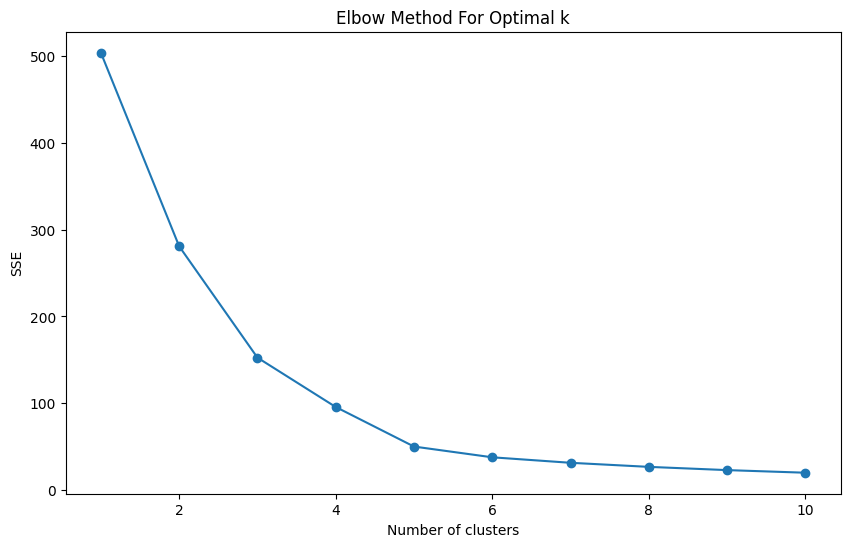

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()